STEPWISE METHODS
-------------------------------

### Forward selection method 

Le principe de la sélection "forward" est d’ajouter, à chaque itération, le facteur qui
maximise le critère. L’ensemble $S^*$ est initialisé avec l’ensemble minimal $S_0$ . A chaque étape de l’algorithme,
l’ensemble $S^*$ est mis à jour par insertion d’une nouvelle variable i. A la fin de l’algorithme, l’ensemble $S^*$
contient les variables qui font partie de la sélection

### Backward selection method 

Le principe de la sélection “backward” est d’enlever à chaque itération un facteur
pour augmenter un des critères précédents. Le facteur retiré est celui qui maximise cette augmentation.

### Both selection method 

Le principe de la sélection “both” est d’enlever ou de rajouter un facteur à chaque itération.

### Algorithme :

0 : $\text{Entrées : } S_{min}=\color{blue}{\text{minimalIndices }},  
                       S_0=\color{blue}{\text{startIndices }},
                       S_{max}$

1 : $\text{Sortie : }S^*$

2 : $\text{Initialisation : } S^* = S_0 \quad, \quad X = (x^k)_{k \in S^*}  \quad, \quad n_{iter} = 0 $

3 : $\text{Initialisation of matrix containing all monomials: } \color{blue}{\text{maxX_}=  X_{max}}$

4 : ${\bf\text{Tant que } n_{iter} < \color{blue}{maxiter\_} \quad\text{faire} :}$

5 : $\quad \quad \text{On estime } \quad L^* = L_{S^*}\hat{=} \log L(\hat{\beta},\hat{\sigma}\mid Y)$

$\quad\quad \quad  \text{ avec }  \color{blue}{\text{ computeLogLikelihood()}} 
\text{  qui calcule : }  
\color{blue}{\text{currentGramInverse_} = (X^T X)^{-1}=A} \quad,\quad  \color{blue}{\text{currentB_} = X^T \,Y=B}
$

6 : $\quad\quad  L^i = -\infty \quad,\quad L^{i'} = -\infty$ 

7 : $\quad\quad {\bf\text{Si}\quad \color{blue}{direction\_ \in \big\{\,FORWARD\,,\,BOTH\,\big\}} \quad \text{Faire} :}$

8 : $\quad\quad\quad\quad$
   $\text{On calcule la matrice de taille} (n\times p) :\,\, \color{blue}{M = X \,A }$ 
   $\text{  et le vecteur de taille} (n) :\,\, \color{blue}{\hat{Y}= X\,A \,X^T\,Y= M \,B  }$ 
   
9 : $\quad\quad\quad\quad$
   $\text{On estime }\quad F_{i}=\|\,Y-H_+\,Y\,\|_2  \quad 
   \text{ et } i = \displaystyle\arg \max_{S_{max} \backslash S^*}\, F_{j}
  \quad \text{ avec }\color{blue}{\text{ computeUpdateForward }(S_{max} \backslash S^*,X, X_{max},\hat{Y}-Y,M)}$
  
10 : $\quad\quad\quad\quad$
   $  L^i = \log L(\hat{\beta}_+,\hat{\sigma}_+\mid Y) \quad \text{avec}\quad n\,\hat{\sigma}_+ = F_{i}  $

11 : $\quad\quad$
     ${\bf\text{Si}\quad \color{blue}{direction\_ \in \big\{\,BACKWARD\,,\,BOTH\,\big\}} \quad \text{Faire} :}$

12 : $\quad\quad\quad\quad$
   $\text{On estime }\quad F_{i'}=\|\,Y-H_{-}\,Y\,\|_2  \quad 
   \text{ et } i' = \displaystyle\arg \max_{S^*\backslash S_{min}}\, F_{j}
  \quad \text{ avec }\color{blue}{\text{ computeUpdateBackward }(S^*\backslash S_{min},X,A,B)}$
     
13 : $\quad\quad\quad\quad$
   $  L^{i'} = \log L(\hat{\beta}_{-},\hat{\sigma}_{-}\mid Y) \quad \text{avec}\quad n\,\hat{\sigma}_{-} = F_{i'}  $

14 : $\quad\quad$
     ${\bf\text{Si}\quad (L^i\color{blue}{+\,penalty\_\, \# (S^*\,\cup \, i)} > L^*\color{blue}{+\,penalty\_\, \# S^*} ) \quad \text{ou} \quad (L^{i'}\color{blue}{+\,penalty\_\, \# (S^*\,\backslash \, i)} > L^*\color{blue}{+\,penalty\_\, \# S^*}) \quad  \text{Faire} :}$
     
14 : $\quad\quad$
     ${\bf\text{Si}\quad (L^i\color{blue}{+\,penalty\_} > L^*) \quad \text{ou} \quad (L^{i'}\color{blue}{-\,penalty\_} > L^*) \quad  \text{Faire} :}$

15 : $\quad\quad\quad\quad$
     ${\bf\text{Si}\quad (L^i\color{blue}{+\,penalty\_}) > (L^{i'}\color{blue}{-\,penalty\_})\quad \text{Faire} :}$
    
16 : $\quad\quad\quad\quad\quad\quad S^* =S^* \,\cup \,  i $

17 : $\quad\quad\quad\quad$
     ${\bf\text{Sinon Faire} :}$
         
18 : $\quad\quad\quad\quad\quad\quad S^* =S^* \,\backslash \,  i' $  

19 : $\quad \quad \quad\quad X = (x^k)_{k \in S^*} $
     
20 : $\quad \quad{\bf\text{ Sinon Faire :}}$

21 : $\quad \quad \quad \quad \text{Quitter}$

24 : $\quad \quad n_{iter} = n_{iter} + 1$

25 : On appele $\color{blue}{\text{ computeLogLikelihood()}}$ qui calcule : 
$\color{blue}{\text{currentGramInverse_} = (X^T X)^{-1}=A} \quad,\quad  \color{blue}{\text{currentB_} = X^T \,Y=B}$

25 : On calcule $\quad\hat{\beta}= \color{blue}{A\,B}$ , $\hat{Y}=X\,\hat{\beta}$ , 
$\hat{\varepsilon}=Y-\hat{Y}$ , 
$\hat{\sigma}^2 = \frac{1}{n} \,\hat{\varepsilon}^T\,\hat{\varepsilon}$ , 
$H_{i,i} = x_i^T\,A\,x_i$

26 : On construit un ${\bf\text{ LinearModelResult}}$ qui contient $(X,Y,\hat{\varepsilon})$.



##  Fonction : computeLogLikeLihood 

On définit $A$ la matrice de taille $(p\times p)$ par :
$$A \hat{=}(X^T X)^{-1} $$ 

On définit $H$ la matrice de projection de taille $(n\times n)$ par :
$$H \hat{=} X_{}\,\big(X^T_{} \,X_{}\big)^{-1} \,X^T_{}  =  X_{}\,A \,X^T_{} $$ 
La fonction log-vraisemblance est donnée par :

$$\log L(\beta,\sigma\mid Y)= -\frac{n}{2}\big(\log(2\pi)+ \log(\sigma^2)\big)- \frac{1}{\sigma^2}\big(Y-X\beta\big)^T\,\big(Y-X\beta\big)$$

####  Le maximum de la fonction LogLikeLihood est  :
$$\boxed{\log L(\hat{\beta},\hat{\sigma}\mid Y)=-\frac{n}{2}\big(\log(2\pi)+ \log(\hat{\sigma}^2)+1\big) }
\quad \text{avec} \quad 
\boxed{ \hat{\sigma}^2 = \frac{1}{n}\big(Y-H\,Y\big)^T\,\big(Y-H\,Y \big)=\frac{1}{n}\|\,Y-H\,Y\,\|_2}
$$

## Fonction : computeLogLikelihoodForward


On définit $X_+$ la matrice $X$ augmentée de la colonne $x_+$ à ajouter de taille $(n \times p+1)$ par :
$$X_+ = (X \,,\,x_+)$$ 

On définit $H$ la matrice de projection de taille $(n\times n)$ par :
$$H_+\, \,\hat{=}\, X_{+}\,\big(X^T_{+} \,X_{+}\big)^{-1} \,X^T_{+} $$ 

La fonction log-vraisemblance pour la sélection “forward”  donne:

$$\boxed{\log L(\hat{\beta}_+,\hat{\sigma}_+\mid Y) =-\frac{n}{2}\big(\log(2\pi)+ \log(\hat{\sigma}_+^2)+1\big)}  
\quad \text{avec} \quad  
\boxed{\hat{\sigma}_+^2  = \frac{1}{n}\big(Y-H_+\,Y\big)^T\,\big(Y-H_+\,Y \big) =\frac{1}{n}\|\,Y-H_+\,Y\,\|_2} $$

### calcul du vecteur de taille $(n)$  : $ H_{+}\,Y$ :

On définit $C$ la matrice de taille $(1 \times 1)$ par :
$$C= x_+^T x_+ -x_+^T \,X\,A \, X^T\, x_+ $$

Le calcul de de la matrice projection $(n\times n)\,:\,$ $H_+$ est donné par :
$$H_{+} \,\hat{=}\, X_{+}\,\big(X^T_{+} \,X_{+}\big)^{-1} \,X^T_{+}  = 
 X\,A \, X^T  + \frac{X\,A \, X^T\,x_+\,(X\,A \, X^T\,x_+)^T}{C} - \frac{X\,A \, X^T\,x_+\,x_+^T}{C} - \frac{x_+\,x_+^T \, X\,A \, X^T}{C} + \frac{x_+\,x_+^T}{C}  $$


$$H_{+}=  X\,A \, X^T + \frac{1}{(x_+^T x_+ -x_+^T \,X\,A \, X^T\, x_+)} \big(\,X\,A \, X^T\,x_+\,x_+^T\,X\,A \, X^T \,-\,X\,A \, X^T\,x_+\,x_+^T \,-\,x_+\,x_+^T \, X\,A \, X^T\,+\,x_+\,x_+^T \,\big) $$

D'après la formultion précédente de $H_+$ on obtient : 

$$ \boxed{H_{+}\,Y = X\,A \, X^T\,Y +\frac{1}{(x_+^T x_+ -x_+^T \,X\,A \, X^T\, x_+)}
\big(\,X\,A \, X^T\,x_+\,(x_+^T\,X\,A \, X^T\,Y) \,-\,X\,A \, X^T\,x_+\,(x_+^T\,Y) \,-\,x_+\,(x_+^T \, X\,A \, X^T\,Y)\,+\,x_+\,(x_+^T\,Y) \,\big)}$$

## Algorithme :  computeLogLikelihoodForward 

on calcule la matrice de taille $(n\times p):\,M= X\,A $ 

on calcule le vecteur de taille $(p) : \, B=X^T\,Y $

on calcule le vecteur de taille $(n)$ : $\,\hat{Y}= X\,A \,X^T\,Y= M \,B  $  

${\bf\text{Pour } j \in S_{max} \backslash S^*  \quad \text{Faire} :}$

$\quad\quad \text{on calcule le vecteur de taille } (p):  b_+=X^T\,x_+ $

$\quad\quad \text{on calcule le vecteur de taille } (n):  d_+=M\,b_+ $

$ \quad\quad \text{on calcule le vecteur de taille } (n):  \boxed{ H_{+}\,Y = \hat{Y} +\frac{x_+^T\,(Y -\hat{Y})}{x_+^T\,(x_+ -d_+)} \big(x_+ -d_+\big) }$

## Fonction : computeLogLikelihoodBackward

On définit $X_{-i}$ la matrice $X$ sans la colonne $i$ de taille $(n \times p-1)$.

On définit $H_{-}$ la matrice de projection de taille $(n\times n)$ par :
$$H_{-}\, \,\hat{=}\, X_{-i}\,\big(X^T_{-i} \,X_{-i}\big)^{-1} \,X^T_{-i} $$

La fonction log-vraisemblance pour la sélection “backward”  donne:

$$\boxed{\log L(\hat{\beta}_{-},\hat{\sigma}_{-}\mid Y) =-\frac{n}{2}\big(\log(2\pi)+ \log(\hat{\sigma}_{-}^2)+1\big)}
\quad \text{avec} \quad 
\boxed{ \hat{\sigma}_{-}^2 = \frac{1}{n}\big(Y-H_{-}\,Y\big)^T\,\big(Y-H_{-}\,Y \big)=\frac{1}{n}\|\,Y-H_{-}\,Y\,\|_2 }$$ 

### calcul du vecteur de taille $(n)$: $ H_{-}\,Y$ :

Le calcul de de la matrice projection $(n\times n)\,:\,$ $H_{-}$ est donné par :
$$H_{-} \,\hat{=}\, X_{-i}\,(X^T_{-i} \,X_{-i})^{-1} \,X^T_{-i}  = X_{-i}\,A_{-i,-i} \, X^T_{-i} \,-\,\frac {1}{A_{i,i}}\,\big(X_{-i}\, A_{-i,i}\big)\, \big(X_{-i}\, A_{-i,i}\big)^T $$


où $A_{-i,-i}$ est la matrice $A$ sans la ligne $i$ ni la colonne $i$, $A_{-i,i}$ est la matrice $A$ sans la ligne $i$ et avec seulement la colonne $i$ et $A_{i,i}$ est le terme $i$ de la diagonale de $A$.

##### deuxième formulation

Afin de ne pas recréer une matrice $A_{-i }= (X^T_{-i} \,X_{-i})^{-1}$ de taille $p-1 \times p-1$,
on écrit les formules en gardant la matrice $A$ mais en mettant des $0$ sur les lignes ou colonnes. 
Soit $X_{i=0}$ la matrice $X$ avec la colonne $i$ mise à $0$, et $A_{,i}$ la colonne $i$ de la matrice $A$, on obtient :
$$H_{-} \,\hat{=}\,X_{i=0}\,A\,X_{i=0}^T \,-\,\frac {1}{A_{i,i}}\,  \big(X_{i=0}\,A_{,i}\big) \big(X_{i=0}\,A_{,i}\big)^T   $$


D'après la formultion précédente de $H_{-}$ on obtient : 

$$ H_{-}\,Y = 
\,X_{i=0}\,A\,X_{i=0}^T\,Y \,-\,\frac {1}{A_{i,i}}\,  \big(X_{i=0}\,A_{,i}\,(A_{i,} X_{i=0}^T\,Y)\,\big)  $$

$\forall B \in \mathbb{R}^p$ on note $\big[B\big]_{i=0}$  le vecteur $B$ de taille $p$ avec la ligne $i$ mise à $0$. 
Avec cette notation, on obtient : 

$$
\forall b \in \mathbb{R}^n\,,\, \forall c \in \mathbb{R}^p  \quad\text{alors}\quad 
X_{i=0}^T\,b \,=\,\big[X^T\,b\big]_{i=0} \quad,\quad X_{i=0}\,c \,=\,X\,\big[c\big]_{i=0}
$$
Soit 
$$ H_{-}\,Y \,= 
\,X\,\big[\,A\,\big[X^T\,Y\big]_{i=0}\,\big]_{i=0} \,-\,\frac {1}{A_{i,i}}\,  \big( X\,\big[\,A_{,i}\,\big]_{i=0}\,\,(A_{i,} \,\big[X^T\,Y\big]_{i=0})\,\big)  
= \,X\,\big[\,A\,\big[X^T\,Y\big]_{i=0}\, -\,\frac {A_{i,} \,\big[X^T\,Y\big]_{i=0}}{A_{i,i}}\,A_{,i}\,      \big]_{i=0} 
$$

De plus on remarque que : 
$$ \big(\,A\,\big[X^T\,Y\big]_{i=0}\, -\,\frac {A_{i,} \,\big[X^T\,Y\big]_{i=0}}{A_{i,i}}\,A_{,i}\,\big)_i
= A_{i,}\,\big[X^T\,Y\big]_{i=0}\, -\,\frac {A_{i,} \,\big[X^T\,Y\big]_{i=0}}{A_{i,i}}\,A_{i,i} = 0
$$
On obtient donc : 
$$\boxed{ H_{-}\,Y \,=\,X\,\big(\,A\,\big[X^T\,Y\big]_{i=0}\, -\,\frac {A_{i,} \,\big[X^T\,Y\big]_{i=0}}{A_{i,i}}\,A_{,i}\,\big) \,\,}
$$

## Algorithme : computeLogLikelihoodBackward 

on calcule le vecteur de taille $(p) : \, B=X^T\,Y $.

${\bf\text{Pour } j \in S^*\backslash S_{min} \quad \text{Faire} :}$

$\quad\quad \text{on calcule le vecteur de taille } (p):  e_{j} =\,A\,\big[B\big]_{j=0} \,$

$ \quad\quad \text{on calcule le vecteur de taille } (n):  \boxed{ H_{-}\,Y 
\,=\, \,X\,  \big(\,e_{j} \,-\,\frac {{(e_{j}})_j}{A_{j,j}}\,A_{,j}\,\big)\,\,   }$

# Diagramme  de classe :  LinearModelStepwiseAlgorithm

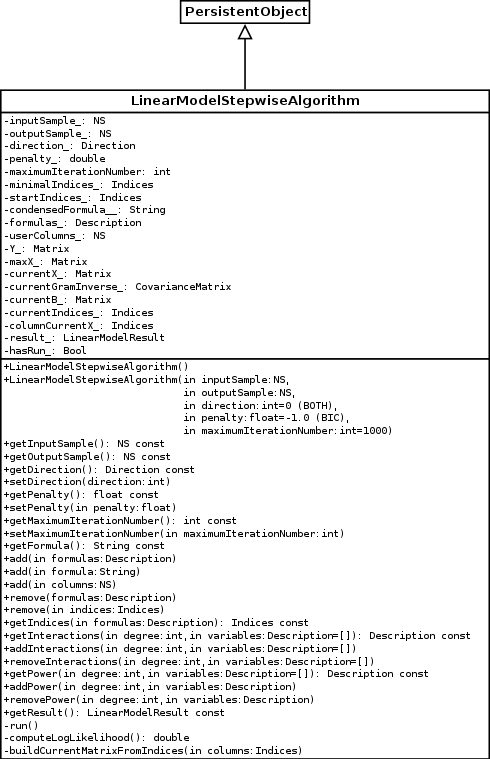

In [1]:
from IPython.display import Image
Image(filename='LinearModelStepwiseAlgorithm.png')